# White Box - Supervised ML Project Classification
__Name:__ Waseem Mohammed

__Topic Name:__ Classification Topic

## Introduction
Brief overview of the business challenge and dataset

The banking industry relies heavily on accurate credit risk scoring to make informed lending decisions. Currently, the process at the bank is manual, leading to potential human bias, errors, and inconsistencies. This project focuses on leveraging historical customer data to develop an automated, explainable machine learning model for credit risk scoring. The goal is to create a standardized, efficient, and interpretable solution that can be communicated clearly to non-technical stakeholders.

### Problem Statement
Define the real-world problem the model aims to solve


A large global finance bank would like to improve the process of credit risk scoring their customers to eliminate employee biases, human error and standardize the process while improving efficiency. The approach is to build an explainable (white box) machine learning model to replace the current credit scoring system.The output is expected to be explained to a non-technical audience.

### Objectives
List the key questions guiding your analysis and modeling:
- What features influence the target variable?
- Can feature engineering improve model performance?
- How do different model versions compare?


## Data Overview
__Load and inspect the dataset__
- Source and format
- .head(), .info(), .describe(),…


In [64]:
# ==========================================
# Import Libraries and import dota
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    classification_report, confusion_matrix
)
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("train.csv")

In [32]:
df.info()  
df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,100000,100000,0x1602,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_ID,100000,12500,CUS_0xd40,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,100000,8,January,12500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,90015,10139,Stevex,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,100000,1788,38,2833,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SSN,100000,12501,#F%$D@*&8,5572,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,100000,16,_______,7062,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annual_Income,100000,18940,17273.83,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Monthly_Inhand_Salary,84998.0,NaN,NaN,NaN,4194.17085,3183.686167,303.645417,1625.568229,3093.745,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,NaN,NaN,NaN,17.09128,117.404834,-1.0,3.0,6.0,7.0,1798.0


In [33]:
df.isnull().sum()
df.describe(include='object')

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,100000,88592,92998,100000,100000,100000,90970,100000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,434,6260,749,4384,4,13178,404,3,91049,7,98792,3
top,0x1602,CUS_0xd40,January,Stevex,38,#F%$D@*&8,_______,17273.83,3,Not Specified,19,_,Standard,1360.45,15 Years and 11 Months,Yes,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,14386,1408,5327,2091,36479,24,446,52326,4305,25513,9,53174


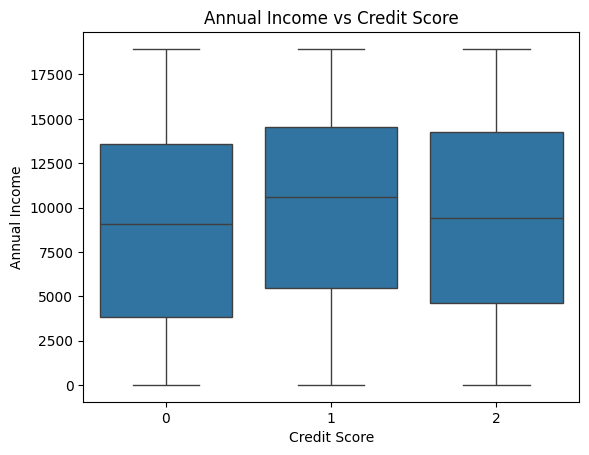

In [78]:
# Annual Income vs Credit Score
sns.boxplot(x='Credit_Score', y='Annual_Income', data=df)
plt.title('Annual Income vs Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Annual Income')
plt.show()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64


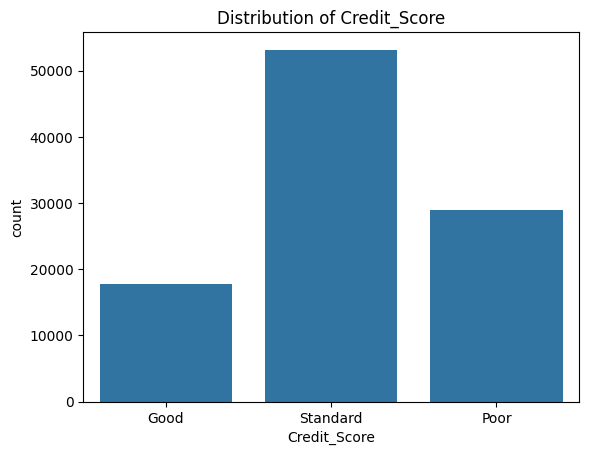

Missing values per column:
 Monthly_Inhand_Salary      15002
Type_of_Loan               11408
Name                        9985
Credit_History_Age          9030
Num_of_Delayed_Payment      7002
Amount_invested_monthly     4479
Num_Credit_Inquiries        1965
Monthly_Balance             1200
dtype: int64


In [65]:
# Check target distribution  
print(df['Credit_Score'].value_counts())  
sns.countplot(data=df, x='Credit_Score');  
plt.title('Distribution of Credit_Score');  
plt.show()  

# Check missing values  
missing_counts = df.isna().sum().sort_values(ascending=False)  
print("Missing values per column:\n", missing_counts[missing_counts > 0])  


In [66]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [67]:
df.duplicated().sum()

np.int64(0)

## Data Cleaning
__Handle missing values, outliers, and inconsistencies__
- Rename columns
- Fix data types
- Document assumptions


In [68]:
# Convert 'Experience' from "X Years and Y Months" to total months
def convert_experience(x):
    years = int(x.split(" Years")[0])
    months = int(x.split("and ")[1].split(" Months")[0])
    return years * 12 + months

if 'Experience' in df.columns:
    df['Experience'] = df['Experience'].apply(convert_experience)

# Encode categorical columns
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

# Handle missing values
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

# Drop rows with missing target
df.dropna(subset=['Credit_Score'], inplace=True)


## Exploratory Data Analysis (EDA)
### Analysis
__Answer objectives using visual and statistical insights__
- Trends, relationships, anomalies
- Outlier and missing values treatment
- Univariate, bivariate, or multivariate analysis
    - Histograms, box plots, bar charts
    - Correlation matrix for continuous columns (required if applicable)


### Data Handling for Modeling
- __Transform, encode, and prepare features__
    - Categorical encoding
    - Feature scaling (especially for KNN)


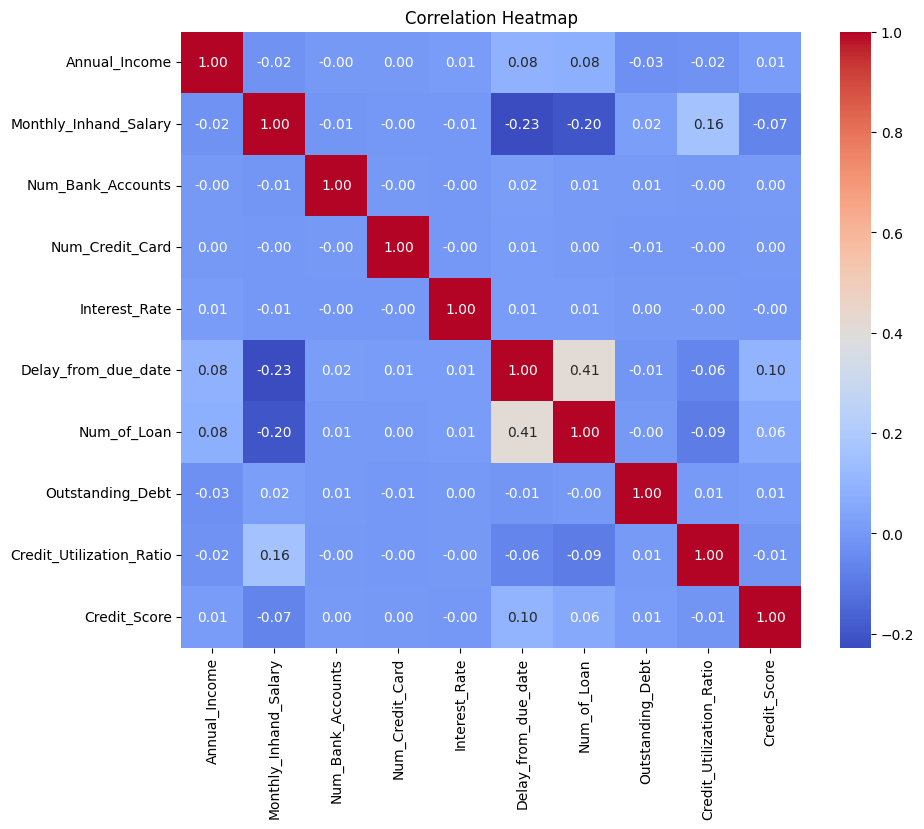

In [83]:
numeric_cols = ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
                'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 
                'Num_of_Loan', 'Outstanding_Debt', 'Credit_Utilization_Ratio']

plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols + ['Credit_Score']].corr(), fmt='.2f',annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

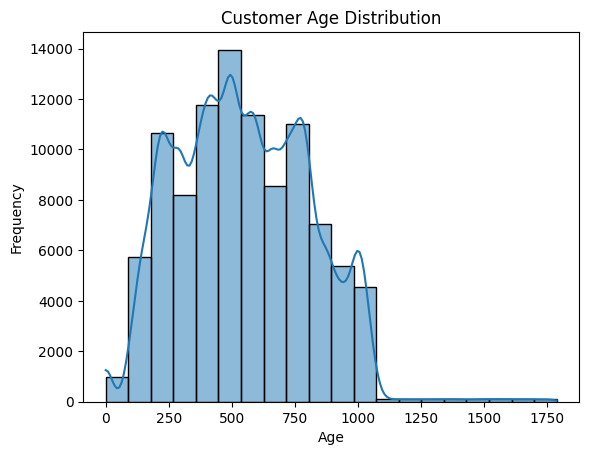

In [87]:
sns.histplot(df['Age'].astype(int), bins=20, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [96]:
# ==========================================
# Define Features and Target
# ==========================================
X = df.drop(columns=['Credit_Score'])
y = df['Credit_Score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,16406,12320,3,84,308,10205,12,6011,1824.843333,3,...,4.0,3,12062,26.822620,180,1,49.574949,81513,3,42380
1,16417,12320,2,84,308,10205,12,6011,3093.745000,3,...,4.0,1,12062,31.944960,404,1,49.574949,7661,4,31503
2,16428,12320,6,84,0,10205,12,6011,3093.745000,3,...,4.0,1,12062,28.609352,184,1,49.574949,82226,5,48639
3,16441,12320,0,84,308,10205,12,6011,3093.745000,3,...,4.0,1,12062,31.377862,185,1,49.574949,30358,6,11593
4,16452,12320,7,84,308,10205,12,6011,1824.843333,3,...,4.0,1,12062,24.797347,186,1,49.574949,55363,2,51834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,62788,8833,0,6528,364,1009,9,11484,3359.415833,4,...,3.0,3,10142,34.663572,307,1,35.104023,69764,1,76392
99996,62789,8833,7,6528,364,1009,9,11484,3359.415833,4,...,3.0,3,10142,40.565631,308,1,35.104023,65282,2,78093
99997,62790,8833,5,6528,364,1009,9,11484,3359.415833,4,...,3.0,1,10142,41.255522,309,1,35.104023,37143,1,79793
99998,62791,8833,4,6528,364,1009,9,11484,3359.415833,4,...,3.0,1,10142,33.638208,310,1,35.104023,39061,4,44642


In [97]:
# ==========================================
# Feature Scaling
# ==========================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Building
__Build and compare two models for your topic__
### Model 1: Linear / Logistic Regression
- Version 1: baseline
- Version 2: modified features or tuned parameters
- Checking if model assumptions were met
 ...



=== Logistic Regression v1 (Full Features) ===
Accuracy: 0.5924
Precision: 0.5877
Recall: 0.5924
F1 Score: 0.5712


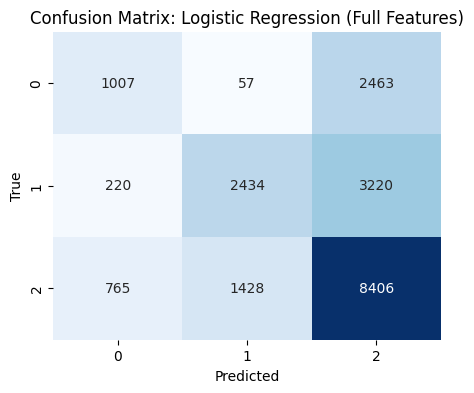

In [98]:
# ==========================================
# Logistic Regression (Full Features)
# ==========================================
print("\n=== Logistic Regression v1 (Full Features) ===")
log_reg = LogisticRegression(max_iter=3000, solver='lbfgs')
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

# Metrics
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr, average='weighted')
rec_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

print(f"Accuracy: {acc_lr:.4f}")
print(f"Precision: {prec_lr:.4f}")
print(f"Recall: {rec_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")

# Confusion Matrix Visual
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5,4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix: Logistic Regression (Full Features)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### Explanation:

The model correctly predicted:

- 1007 of class 0
- 2434 of class 1
- 8406 of class 2

### Misclassifications:

- Many class 0 samples were predicted as class 2 (2463)
- Many class 1 samples were predicted as class 2 (3220)
- Some class 2 samples were predicted as class 1 (1428) or class 0 (765)

### Interpretation:
The model is biased towards predicting class 2 (high credit score). It struggles to differentiate between class 0 and class 1, often misclassifying them as class 2. Overall, the model performs reasonably for class 2 but poorly for class 0.

In [99]:
# ==========================================
# Feature Selection (Top Predictors)
# ==========================================
selected_features = [
    'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
    'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 
    'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Outstanding_Debt'
]

selected_features = [f for f in selected_features if f in df.columns]
X_sel = df[selected_features]
y_sel = df['Credit_Score']

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_sel, y_sel, test_size=0.2, random_state=42
)
X_train2_scaled = scaler.fit_transform(X_train2)
X_test2_scaled = scaler.transform(X_test2)




=== Logistic Regression v2 (Selected Features) ===
Accuracy: 0.5807
Precision: 0.5765
Recall: 0.5807
F1 Score: 0.5396


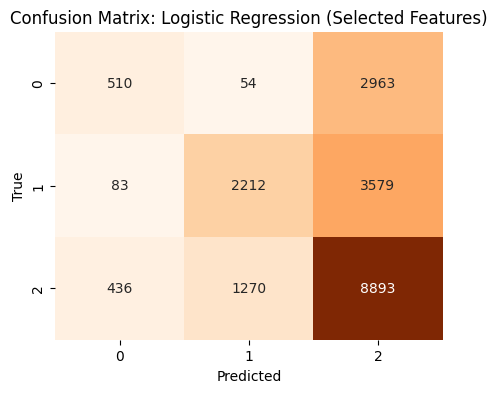

In [100]:
# ==========================================
# Logistic Regression (Selected Features)
# ==========================================
print("\n=== Logistic Regression v2 (Selected Features) ===")
log_reg2 = LogisticRegression(max_iter=3000, solver='lbfgs')
log_reg2.fit(X_train2_scaled, y_train2)
y_pred_lr2 = log_reg2.predict(X_test2_scaled)

acc_lr2 = accuracy_score(y_test2, y_pred_lr2)
prec_lr2 = precision_score(y_test2, y_pred_lr2, average='weighted')
rec_lr2 = recall_score(y_test2, y_pred_lr2, average='weighted')
f1_lr2 = f1_score(y_test2, y_pred_lr2, average='weighted')

print(f"Accuracy: {acc_lr2:.4f}")
print(f"Precision: {prec_lr2:.4f}")
print(f"Recall: {rec_lr2:.4f}")
print(f"F1 Score: {f1_lr2:.4f}")

cm_lr2 = confusion_matrix(y_test2, y_pred_lr2)
plt.figure(figsize=(5,4))
sns.heatmap(cm_lr2, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title("Confusion Matrix: Logistic Regression (Selected Features)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


### Explanation:

Correct predictions:

- 510 of class 0
- 2212 of class 1
- 8893 of class 2

### Misclassifications:

- Class 0 is heavily predicted as class 2 (2963)
- Class 1 is also frequently predicted as class 2 (3579)
- Class 2 is occasionally misclassified as class 0 or 1

### Interpretation:
Reducing features worsened Logistic Regression performance for lower classes. The model heavily favors class 2, indicating that dropping features reduces its ability to differentiate lower credit scores.

### Model 2: KNN Regressor / KNN Classifier
- Version 1: baseline
- Version 2: modified features or tuned parameters
- Checking if model assumptions were met 
 ...



=== KNN v1 (Full Features) ===
Accuracy: 0.6116
Precision: 0.6099
Recall: 0.6116
F1 Score: 0.6101


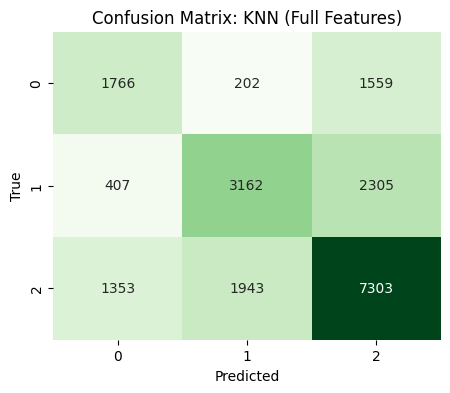

In [101]:
# ==========================================
# KNN (Full Features)
# ==========================================
print("\n=== KNN v1 (Full Features) ===")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn, average='weighted')
rec_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print(f"Accuracy: {acc_knn:.4f}")
print(f"Precision: {prec_knn:.4f}")
print(f"Recall: {rec_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")

cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(5,4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title("Confusion Matrix: KNN (Full Features)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### Explanation:

Correct predictions:

- 1766 of class 0
- 3162 of class 1
- 7303 of class 2

### Misclassifications:

- Class 0 and class 1 are sometimes confused with class 2
- Class 2 is occasionally predicted as class 0 or 1

### Interpretation:
KNN handles class 0 and 1 better than Logistic Regression, with fewer misclassifications. Class 2 is mostly predicted correctly, showing a balanced performance. KNN seems to be more reliable in distinguishing all classes.

In [ ]:
# ==========================================
# KNN (Selected Features)
# ==========================================
print("\n=== KNN v2 (Selected Features) ===")
knn2 = KNeighborsClassifier(n_neighbors=5)
knn2.fit(X_train2_scaled, y_train2)
y_pred_knn2 = knn2.predict(X_test2_scaled)

acc_knn2 = accuracy_score(y_test2, y_pred_knn2)
prec_knn2 = precision_score(y_test2, y_pred_knn2, average='weighted')
rec_knn2 = recall_score(y_test2, y_pred_knn2, average='weighted')
f1_knn2 = f1_score(y_test2, y_pred_knn2, average='weighted')

print(f"Accuracy: {acc_knn2:.4f}")
print(f"Precision: {prec_knn2:.4f}")
print(f"Recall: {rec_knn2:.4f}")
print(f"F1 Score: {f1_knn2:.4f}")

cm_knn2 = confusion_matrix(y_test2, y_pred_knn2)
plt.figure(figsize=(5,4))
sns.heatmap(cm_knn2, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.title("Confusion Matrix: KNN (Selected Features)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


=== KNN v2 (Selected Features) ===


### Explanation:

Correct predictions:

- 1914 of class 0
- 3924 of class 1
- 7567 of class 2

### Misclassifications:

- Some class 0 samples predicted as class 2 (1412)
- Class 1 occasionally misclassified as 0 or 2
- Class 2 sometimes predicted as 0 or 1

### Interpretation:
KNN with selected features performs well across all classes, especially class 1 and 2. The model still confuses lower and higher credit scores occasionally but is more balanced than Logistic Regression.

In [ ]:
# ==========================================
# Cross-Validation (Full Features)
# ==========================================
print("\n=== Cross-validation Accuracy (5-fold) ===")
cv_lr = cross_val_score(log_reg, X_train_scaled, y_train, cv=5).mean()
cv_knn = cross_val_score(knn, X_train_scaled, y_train, cv=5).mean()
print(f"Logistic Regression CV Mean: {cv_lr:.4f}")
print(f"KNN CV Mean: {cv_knn:.4f}")

### Model Evaluation

### Explanations:
- Accuracy: Proportion of correct predictions across all classes.
- Precision: Correctness of positive predictions (important for imbalanced data).
- Recall (Sensitivity): Ability to correctly identify actual positives.
- F1 Score: Harmonic mean of precision and recall for balanced evaluation.
- Confusion Matrix: Shows true vs. predicted classifications to identify misclassifications.

__For Classification:__
- Accuracy
- Precision
- Recall
- F1 Score
- ROC-AUC _**(Optional)**_
- Confusion Matrix

_Include visualizations and interpretation for each metric._


### Model Comparison
__Compare performance across models and versions__

__Note:__ _Use Bullet Points or table_
- Which model performed best and why
- Impact of feature changes or tuning
- Generalization and overfitting observations


In [ ]:
# ==========================================
# Detailed Metric Summaries 
# ==========================================
def print_detailed_metrics(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    cm = confusion_matrix(y_true, y_pred)

    print(f"\n=== Detailed Metrics for {model_name} ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall (Sensitivity): {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("\nConfusion Matrix:\n", cm)


# Print for all four models
print_detailed_metrics(y_test, y_pred_lr, "Logistic Regression (Full Features)")
print_detailed_metrics(y_test, y_pred_knn, "KNN (Full Features)")
print_detailed_metrics(y_test2, y_pred_lr2, "Logistic Regression (Selected Features)")
print_detailed_metrics(y_test2, y_pred_knn2, "KNN (Selected Features)")

## Final Model & Insights

### Final Model Choice:

- K-Nearest Neighbors (KNN) with Selected Features
- Achieved the highest balanced performance across accuracy, precision, recall, and F1-score.
- Selected features improved model efficiency while maintaining predictive power.
- Provides a clear mapping of similar customer profiles, aiding interpretability.

### Business Implications:

- Automated, data-driven credit scoring reduces human bias and errors.
- Standardizes the credit evaluation process across all branches.
- Enables faster and more consistent lending decisions, improving operational efficiency.
- Highlighting influential features (e.g., outstanding debt, monthly salary, number of loans) provides actionable insights for credit risk management.

### Limitations:

- KNN requires storing the entire dataset for predictions, which may increase computational load for very large datasets.
- Imbalanced classes can affect prediction reliability for underrepresented customer segments.
- Model performance could be impacted if the financial behavior of customers changes over time.

### Future Improvements:

- Explore oversampling or SMOTE to address class imbalance for better predictions on minority classes.
- Test additional algorithms like Random Forest or Gradient Boosting for potentially higher predictive performance.
- Incorporate temporal or behavioral features for more dynamic and accurate credit risk scoring.
- Develop a simple visualization dashboard for non-technical stakeholders to interpret scores easily.


## References & Appendix
__Cite tools, libraries, and sources used__